In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot

# fpath = "C:/Users/stell/UGRP_Github_desktop/UGRP/individual_workspace/CHJ/"

#before_data = np.load("multichannel_signal" + ".npy")
#during_data = np.load("contaminated_by_realistic_correlatied" + ".npy")

n_channels, n_samples = during_data.shape

mean_data = np.mean(during_data, axis=0) # len; 4000

filtered_data = np.zeros_like(during_data)
for i in range(len(during_data)):
    filtered_data[i, :] = during_data[i, :] - mean_data[:]

# print(len(mean_data), during_data.shape) # 4000 (32, 4000)

# 채널 정보
stim_ch = 11
target_ch = 12

fs = 2000  # 샘플링 주파수
frequencies = np.linspace(-fs/2, fs/2, n_samples)  # 주파수 범위 설정
time = np.arange(n_samples) / fs # 시간 범위 설정

In [11]:
# # 결과 출력 - 전체 채널
# plt.figure(figsize=(20, 18))
# for i in range(n_channels):
#     plt.subplot(n_channels, 1, i+1)
#     plt.plot(time, during_data[i, :], 'r', label='during_data')
#     plt.plot(time, filtered_data[i, :], 'g', label='filtered_data')
#     plt.xlim(0, 2)
#     plt.title(f'Channel {i+1}')
    
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()

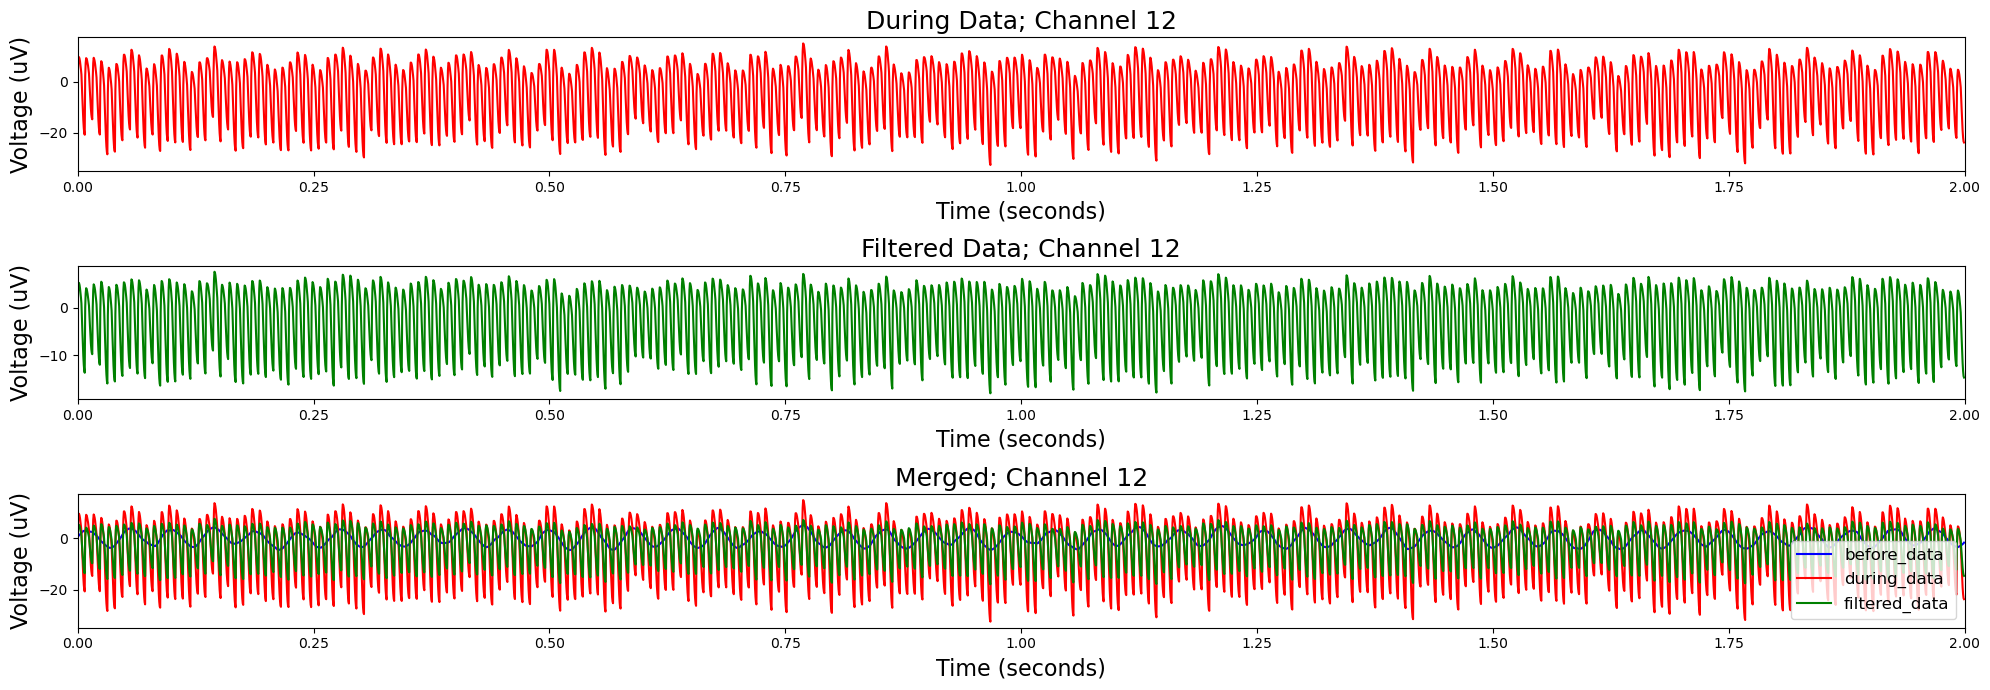

In [12]:
# 결과 플로팅 - 내가 볼 채널만
plt.figure(figsize=(20, 7))

# 원본 데이터
plt.subplot(3, 1, 1)
plt.plot(time, during_data[target_ch, :], 'r')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'During Data; Channel {target_ch}', fontsize=18)

# 필터된 데이터
plt.subplot(3, 1, 2)
plt.plot(time, filtered_data[target_ch, :], 'g')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Filtered Data; Channel {target_ch}', fontsize=18)

# Time domain
plt.subplot(3, 1, 3)
plt.plot(time, before_data[target_ch, :], 'b', label='before_data')
plt.plot(time, during_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Merged; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

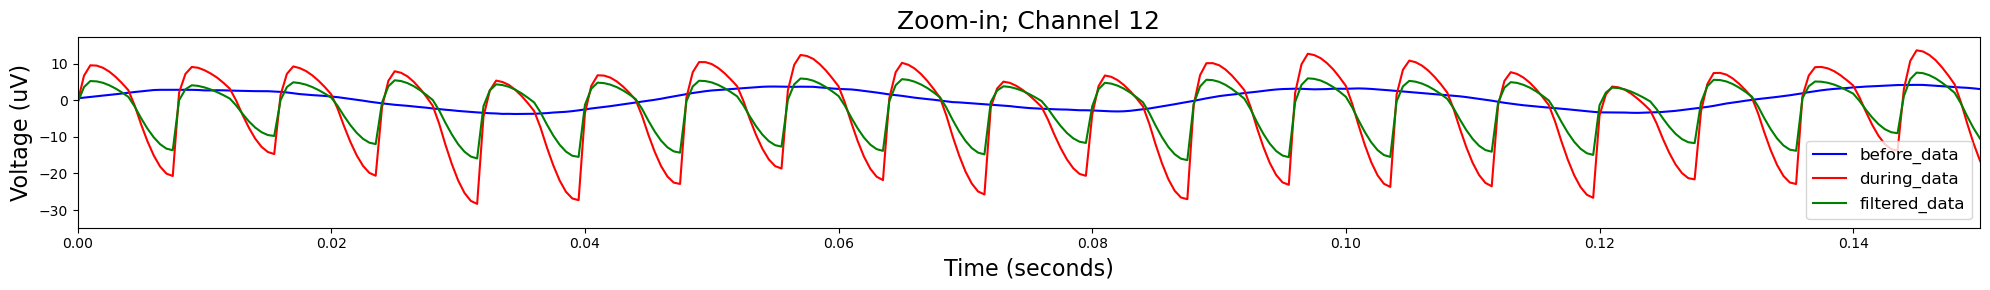

In [13]:
# 결과 플로팅 - 줌인
plt.figure(figsize=(20, 3))

start_t = 0
end_t = 0.15

plt.plot(time, before_data[target_ch, :], 'b', label='before_data')
plt.plot(time, during_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(start_t, end_t)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Zoom-in; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

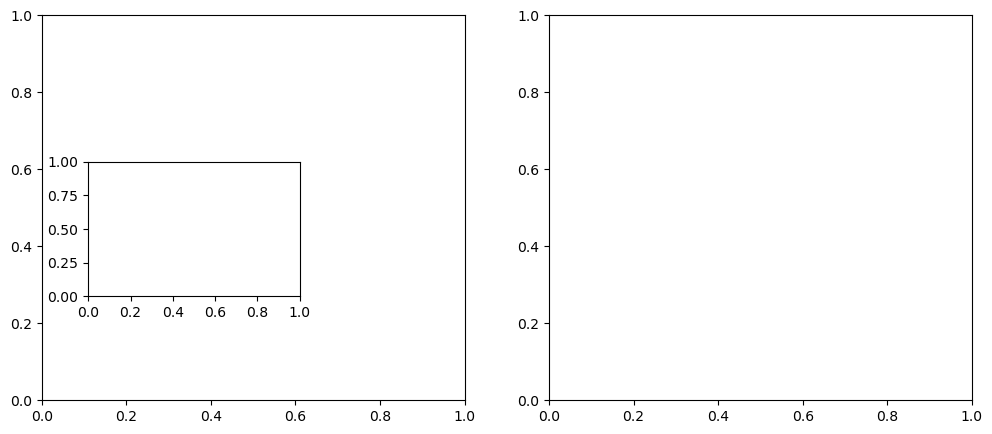

In [16]:
Result_Plot(during_data, filtered_data, before_data) # inverse scaled data를 input으로 넣음


#Result_Plot_paper(during_data, filtered_data, before_data, save_path, save_title) # inverse scaled data를 input으로 넣음

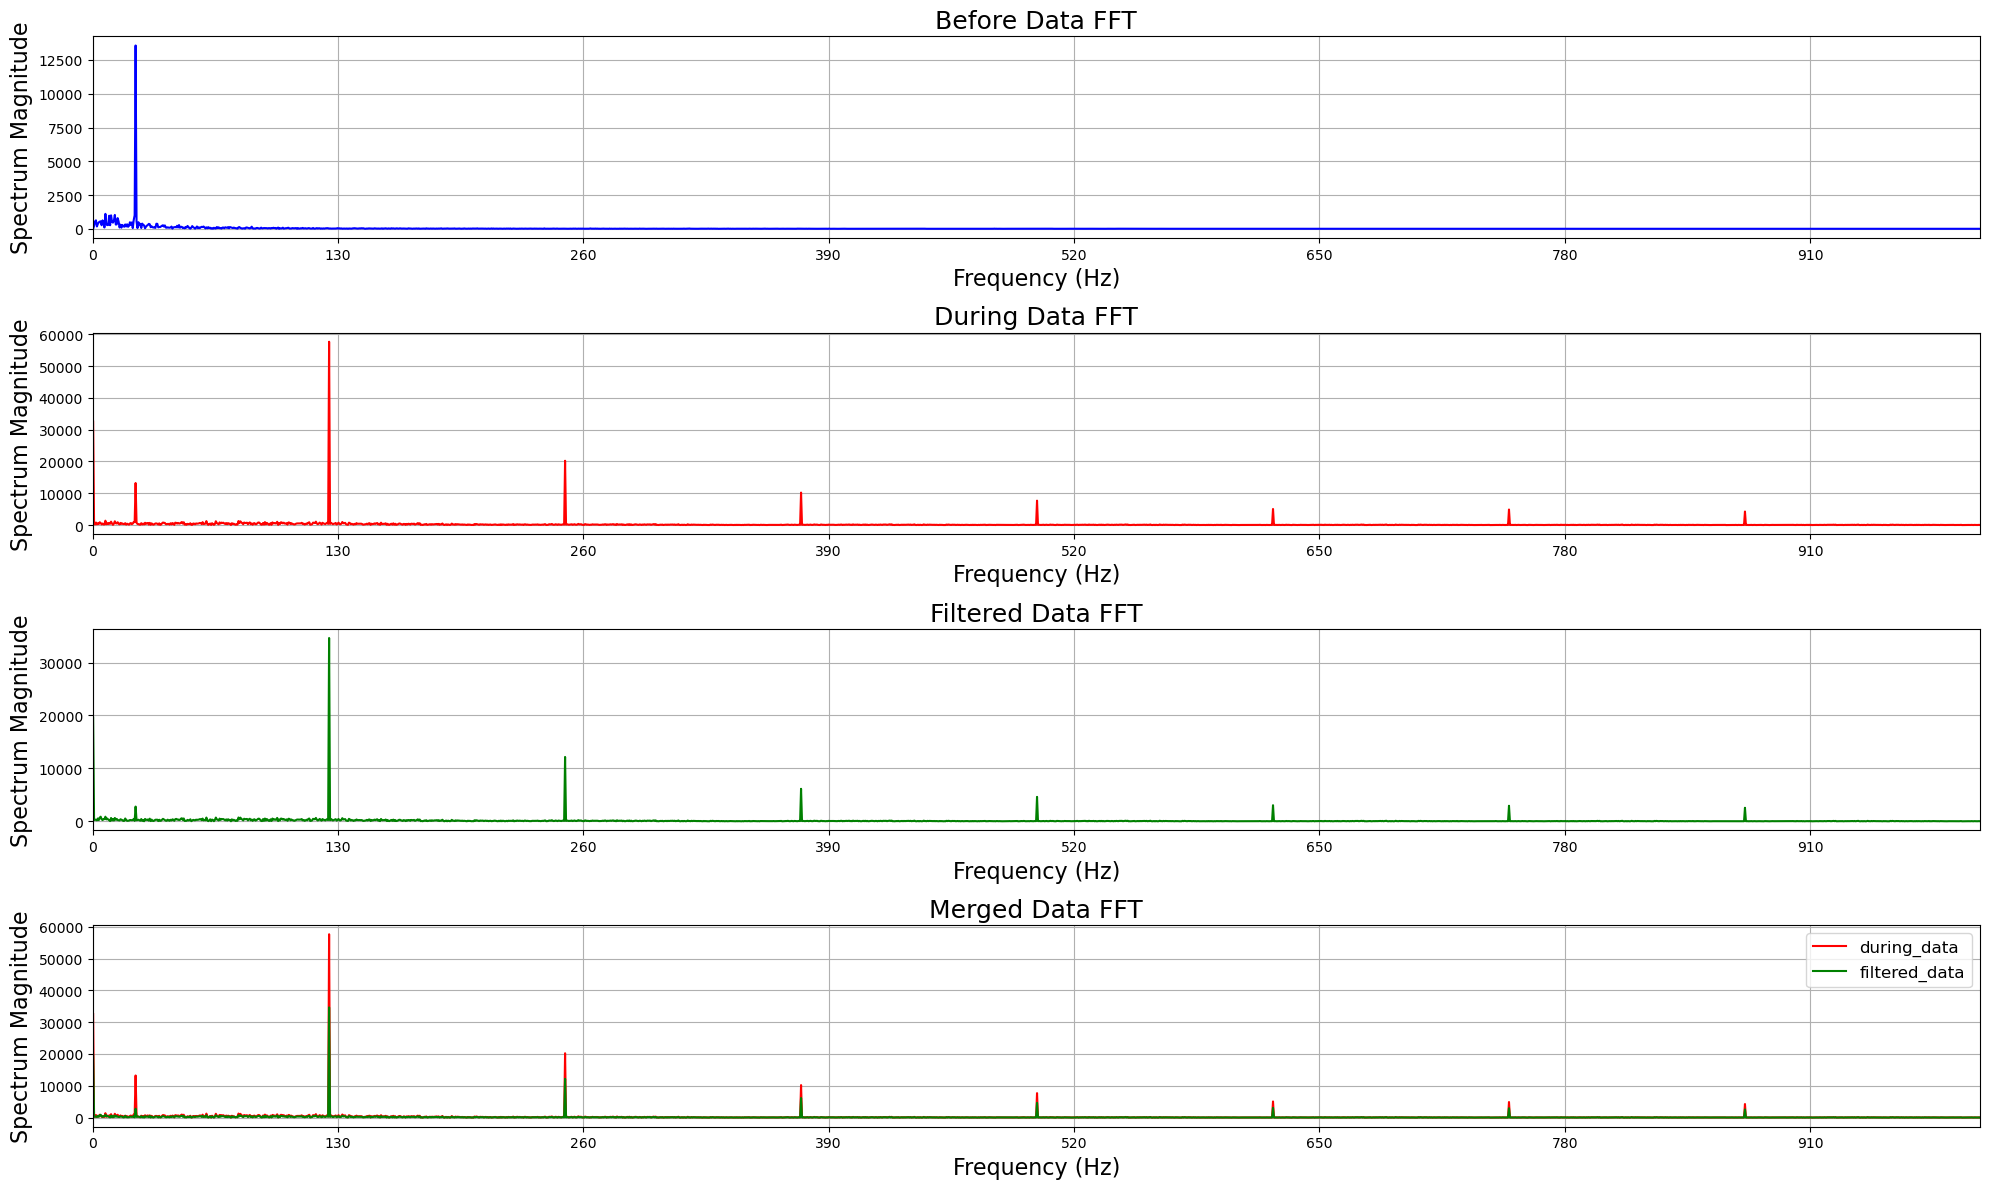

In [5]:
# 푸리에 변환 수행
before_fft_result = np.fft.fftshift(np.fft.fft(before_data, axis=1), axes=1)
during_fft_result = np.fft.fftshift(np.fft.fft(during_data, axis=1), axes=1)
filtered_fft_result = np.fft.fftshift(np.fft.fft(filtered_data, axis=1), axes=1)

# 양수 부분의 주파수와 푸리에 변환 결과 가져오기
positive_frequencies = frequencies[n_samples//2:]
positive_before_fft_result = 2 * before_fft_result[:, n_samples//2:]
positive_during_fft_result = 2 * during_fft_result[:, n_samples//2:]
positive_filtered_fft_result = 2 * filtered_fft_result[:, n_samples//2:]

# 푸리에 스펙트럼 플로팅
plt.figure(figsize=(20, 12))

# 자극 전 데이터
plt.subplot(4, 1, 1)
plt.plot(positive_frequencies, np.abs(positive_before_fft_result[target_ch, :]), 'b', label='before_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Before Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# 원본 데이터
plt.subplot(4, 1, 2)
plt.plot(positive_frequencies, np.abs(positive_during_fft_result[target_ch, :]), 'r', label='during_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('During Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# 필터된 데이터
plt.subplot(4, 1, 3)
plt.plot(positive_frequencies, np.abs(positive_filtered_fft_result[target_ch, :]), 'g', label='filtered_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Filtered Data FFT', fontsize=18)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

# Freq. domain
plt.subplot(4, 1, 4)
plt.plot(positive_frequencies, np.abs(positive_during_fft_result[target_ch, :]), 'r', label='during_data')
plt.plot(positive_frequencies, np.abs(positive_filtered_fft_result[target_ch, :]), 'g', label='filtered_data')
plt.xlim([0, fs/2])
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.ylabel('Spectrum Magnitude', fontsize=16)
plt.title('Merged Data FFT', fontsize=18)
plt.legend(fontsize=12)
plt.grid()
plt.gca().set_xticks(np.arange(0, positive_frequencies[-1], 130))

plt.tight_layout()
plt.show()

In [6]:
# 평가
print("Time domain")
mae_time = mean_absolute_error(during_data[target_ch, :], filtered_data[target_ch, :])
mse_time = mean_squared_error(during_data[target_ch, :], filtered_data[target_ch, :])
print(f"Mean Absolute Error: {mae_time:.4f}")
print(f"Mean Squared Error: {mse_time:.4f}")

print("\nFrequency domain")

dft_magnitude_during = np.abs(positive_during_fft_result)**2
dft_magnitude_filtered = np.abs(positive_filtered_fft_result)**2

# 로그 변환: 0 값 처리
dft_magnitude_during[dft_magnitude_during <= 0] = np.finfo(float).eps
dft_magnitude_filtered[dft_magnitude_filtered <= 0] = np.finfo(float).eps

log_dft_magnitude_during = np.log10(dft_magnitude_during)
log_dft_magnitude_filtered = np.log10(dft_magnitude_filtered)

mae_freq = mean_absolute_error(log_dft_magnitude_during, log_dft_magnitude_filtered)
mse_freq = mean_squared_error(log_dft_magnitude_during, log_dft_magnitude_filtered)

print(f"Mean Absolute Error: {mae_freq:.4f}")
print(f"Mean Squared Error: {mse_freq:.4f}")

Time domain
Mean Absolute Error: 4.0992
Mean Squared Error: 26.5656

Frequency domain
Mean Absolute Error: 1.1042
Mean Squared Error: 1.9028
